[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/AtrCheema/ai4water_examples/blob/master/docs/source/_notebooks/preprocessing/transformations.ipynb)

[![View Source on GitHub](https://img.shields.io/badge/github-view%20source-black.svg)](https://github.com/AtrCheema/ai4water_examples/blob/master/docs/source/_notebooks/preprocessing/transformations.ipynb)

## Transformations

This notebook shows how to apply different transformations in input and output features and their impact on model perofrmance.


In [1]:


from ai4water import Model
from ai4water.datasets import MtropicsLaos
from ai4water.utils.utils import get_version_info

from easy_mpl import boxplot, ridge

D:\C\Anaconda3\envs\tfcpu27_py39\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
D:\C\Anaconda3\envs\tfcpu27_py39\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
D:\C\Anaconda3\envs\tfcpu27_py39\lib\site-packages\numpy\.libs\libopenblas.GK7GX5KEQ4F6UYO3P26ULGBQYHGQO7J4.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"
D:\C\Anaconda3\envs\tfcpu27_py39\lib\site-packages\sklearn\experimental\enable_hist_gradient_boosting.py:16: UserWarning: Since version 1.0, it is not needed to import enable_hist_gradient_boosting anymore. HistGradientBoostingClassifier and HistGradientBoostingRegressor are now stable and can be normally imported from sklearn.ensemble.
  warnings.warn(


In [2]:
for lib,ver in get_version_info().items():
    print(lib, ver)  # print versions of the libraries used

python 3.9.7 | packaged by conda-forge | (default, Sep 29 2021, 19:20:16) [MSC v.1916 64 bit (AMD64)]
os nt
ai4water 1.06
lightgbm 3.3.1
tcn 3.4.0
catboost 0.26
xgboost 1.5.0
easy_mpl 0.21.3
SeqMetrics 1.3.3
tensorflow 2.7.0
keras.api._v2.keras 2.7.0
numpy 1.21.0
pandas 1.3.4
matplotlib 3.4.3
h5py 3.5.0
sklearn 1.0.1
shapefile 2.3.0
xarray 0.20.1
netCDF4 1.5.7
optuna 2.10.1
skopt 0.9.0
hyperopt 0.2.7
plotly 5.3.1
lime NotDefined
seaborn 0.11.2


In [3]:
dataset = MtropicsLaos(
    path="F:\\data\\MtropicsLaos"  # path where the data is saved/downloaded. If not, then let path=None
)  


    Not downloading the data since the directory 
    F:\data\MtropicsLaos already exists.
    Use overwrite=True to remove previously saved files and download again


In [4]:
data = dataset.make_regression(lookback_steps=1)
data.shape

Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.


(258, 9)

In [5]:
inputs = data.columns.tolist()[0:-1]
inputs

['air_temp',
 'rel_hum',
 'wind_speed',
 'sol_rad',
 'water_level',
 'pcp',
 'susp_pm',
 'Ecoli_source']

In [6]:
model = Model(
    model="RandomForestRegressor",
    val_fraction=0.0
)

_ = model.fit(data=data)
t_test, p_test = model.predict_on_test_data(data=data, process_results=False, return_true=True)
t_train, p_train = model.predict_on_training_data(data=data, process_results=False, return_true=True)
model.evaluate_on_test_data(data=data, metrics=['r2', 'r2_score'])


            building ML model for  
            regression problem using RandomForestRegressor
***** Training *****
input_x shape:  (180, 8)
target shape:  (180, 1)
***** Test *****
input_x shape:  (78, 8)
target shape:  (78, 1)
***** Training *****
input_x shape:  (180, 8)
target shape:  (180, 1)
***** Test *****
input_x shape:  (78, 8)
target shape:  (78, 1)


{'r2': 0.16795372023026572, 'r2_score': 0.15882331484258694}

In [7]:
model = Model(
    model="RandomForestRegressor",
    y_transformation = "minmax",
    val_fraction=0.0
)

_ = model.fit(data=data)
t_minmax_test, p_minmax_test = model.predict_on_test_data(data=data, process_results=False, return_true=True)
t_minmax_train, p_minmax_train = model.predict_on_training_data(data=data, process_results=False, return_true=True)
model.evaluate_on_test_data(data=data, metrics=['r2', 'r2_score'])


            building ML model for  
            regression problem using RandomForestRegressor
***** Training *****
input_x shape:  (180, 8)
target shape:  (180, 1)
***** Test *****
input_x shape:  (78, 8)
target shape:  (78, 1)
***** Training *****
input_x shape:  (180, 8)
target shape:  (180, 1)
***** Test *****
input_x shape:  (78, 8)
target shape:  (78, 1)


{'r2': 0.16277415505198237, 'r2_score': 0.15489058460852678}

In [8]:
model = Model(
    model="RandomForestRegressor",
    y_transformation = {'method':'log', 'treat_negatives': True, 'replace_zeros': True},
    val_fraction=0.0
)

_ = model.fit(data=data)

t_log_test, p_log_test = model.predict_on_test_data(data=data, process_results=False, return_true=True)
t_log_train, p_log_train = model.predict_on_training_data(data=data, process_results=False, return_true=True)
model.evaluate_on_test_data(data=data, metrics=['r2', 'r2_score'])


            building ML model for  
            regression problem using RandomForestRegressor
***** Training *****
input_x shape:  (180, 8)
target shape:  (180, 1)
***** Test *****
input_x shape:  (78, 8)
target shape:  (78, 1)
***** Training *****
input_x shape:  (180, 8)
target shape:  (180, 1)
***** Test *****
input_x shape:  (78, 8)
target shape:  (78, 1)


{'r2': 0.3029100091159297, 'r2_score': 0.20635029869566568}

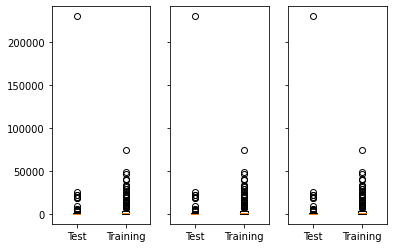

In [9]:
import matplotlib.pyplot as plt


f, axes = plt.subplots(1,3, sharey="all")

axes = axes.flatten()

_ = boxplot([t_test.reshape(-1,), t_train.reshape(-1,)], ax=axes[0], show=False, labels=["Test", "Training"])

_ = boxplot([t_minmax_test.reshape(-1,), t_minmax_train.reshape(-1,)], ax=axes[1], show=False, 
            labels=["Test", "Training"])

_ = boxplot([t_log_test.reshape(-1,), t_log_train.reshape(-1,)], ax=axes[2], show=False, labels=["Test", "Training"])

plt.show()

In [10]:
model = Model(
    model="RandomForestRegressor",
    x_transformation="minmax",
    y_transformation = {'method':'log', 'treat_negatives': True, 'replace_zeros': True},
    val_fraction=0.0
)

_ = model.fit(data=data)

model.evaluate_on_test_data(data=data, metrics=['r2', 'r2_score'])


            building ML model for  
            regression problem using RandomForestRegressor
***** Training *****
input_x shape:  (180, 8)
target shape:  (180, 1)
***** Test *****
input_x shape:  (78, 8)
target shape:  (78, 1)


{'r2': 0.30047682922342284, 'r2_score': 0.20491809820446527}

In [11]:
model = Model(
    model="RandomForestRegressor",
    x_transformation="zscore",
    y_transformation = {'method':'log', 'treat_negatives': True, 'replace_zeros': True},
    val_fraction=0.0
)

_ = model.fit(data=data)

model.evaluate_on_test_data(data=data, metrics=['r2', 'r2_score'])


            building ML model for  
            regression problem using RandomForestRegressor
***** Training *****
input_x shape:  (180, 8)
target shape:  (180, 1)
***** Test *****
input_x shape:  (78, 8)
target shape:  (78, 1)


{'r2': 0.3029087206809293, 'r2_score': 0.20634949505073052}

In [12]:
model = Model(
    model="RandomForestRegressor",
    x_transformation={"method": "zscore", "features": ["air_temp", "rel_hum"]},
    y_transformation = {'method':'log', 'treat_negatives': True, 'replace_zeros': True},
    input_features=inputs,
    val_fraction=0.0
)

_ = model.fit(data=data)

model.evaluate_on_test_data(data=data, metrics=['r2', 'r2_score'])


            building ML model for  
            regression problem using RandomForestRegressor
***** Training *****
input_x shape:  (180, 8)
target shape:  (180, 1)
***** Test *****
input_x shape:  (78, 8)
target shape:  (78, 1)


{'r2': 0.3029100091159297, 'r2_score': 0.20635029869566568}

In [13]:
model = Model(
    model="RandomForestRegressor",
    x_transformation=[
        {"method": "zscore", "features": ["air_temp", "rel_hum"]},
        {"method": "robust", "features": ["pcp", "susp_pm"]}
    ],
    y_transformation = {'method':'log', 'treat_negatives': True, 'replace_zeros': True},
    input_features=inputs,
    val_fraction=0.0
)

_ = model.fit(data=data)

model.evaluate_on_test_data(data=data, metrics=['r2', 'r2_score'])


            building ML model for  
            regression problem using RandomForestRegressor
***** Training *****
input_x shape:  (180, 8)
target shape:  (180, 1)
***** Test *****
input_x shape:  (78, 8)
target shape:  (78, 1)


{'r2': 0.3029100091159297, 'r2_score': 0.20635029869566568}